# Información y Programación Financiera, TI, Algoritmos y Ciencia de Datos

Neftalí Valdez

<a href="http://twitter.com/neftalivldz" target="_blank">@neftalivldz</a> | <a href="mailto:nvaldez@tec.mx">nvaldez@tec.mx</a>

# Importar librerías

In [98]:
import eikon as ek  # the Eikon Python wrapper package
import numpy as np  # NumPy
import pandas as pd  # pandas
import cufflinks as cf  # Cufflinks
import configparser as cp
cf.set_config_file(offline=True)  # set the plotting mode to offline

from pathlib import Path
import pandas_datareader.data as web

import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
from sklearn.preprocessing import scale
import talib

import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
cfg = cp.ConfigParser()
cfg.read('../refinitiv.cfg')
ek.set_app_key(cfg['eikon']['app_id'])

In [100]:
from datetime import datetime, timedelta
today = datetime.today()
past = today - timedelta(days=(365*.5))
print(today, past)
df = ek.get_timeseries('BIMBOA.MX', start_date = past, end_date = today, fields=['HIGH', 'LOW', 'CLOSE'], interval="daily")
df = df.rename(columns={"HIGH": "high", "LOW": "low", "CLOSE": "close"})
df

2023-09-19 17:37:59.546309 2023-03-21 05:37:59.546309


BIMBOA.MX,high,low,close
Date,,,
2023-03-22,89.4,87.34,87.62
2023-03-23,88.57,86.65,87.12
2023-03-24,88.0,86.54,87.17
2023-03-27,88.87,87.61,88.38
2023-03-28,90.0,88.22,88.44
...,...,...,...
2023-09-13,83.65,81.5,82.62
2023-09-14,83.39,81.72,82.37
2023-09-15,83.25,81.51,81.95


## TA-Lib: Function Groups

In [101]:
function_groups = ['Overlap Studies',
                   'Momentum Indicators',
                   'Volume Indicators',
                   'Volatility Indicators',
                   'Price Transform',
                   'Cycle Indicators',
                   'Pattern Recognition',
                   'Statistic Functions',
                   'Math Transform',
                   'Math Operators']

In [102]:
df['20_SMA'] = df['close'].rolling(window = 20, min_periods = 1).mean()
# create 50 days simple moving average column
df['50_SMA'] = df['close'].rolling(window = 50, min_periods = 1).mean()
# display first few rows
df2 = df[50:]
df2.head()

BIMBOA.MX,high,low,close,20_SMA,50_SMA
Date,,,,,
2023-06-05,92.75,91.75,92.43,94.0345,92.8536
2023-06-06,93.44,92.03,92.37,93.7575,92.9586
2023-06-07,92.87,91.16,91.39,93.3990,93.0430
2023-06-08,93.4,91.7,92.83,93.2175,93.1320
2023-06-09,94.9,92.97,94.22,93.0945,93.2476


In [103]:
df2['Signal'] = 0.0
df2['Signal'] = np.where(df2['20_SMA'] > df2['50_SMA'], 1.0, 0.0)
df2['Position_alt'] = np.where(df2['20_SMA'] > df2['50_SMA'], 1.0, -1.0)
df2.head(10)

BIMBOA.MX,high,low,close,20_SMA,50_SMA,Signal,Position_alt
Date,,,,,,,
2023-06-05,92.75,91.75,92.43,94.0345,92.8536,1.0,1.0
2023-06-06,93.44,92.03,92.37,93.7575,92.9586,1.0,1.0
2023-06-07,92.87,91.16,91.39,93.3990,93.0430,1.0,1.0
2023-06-08,93.4,91.7,92.83,93.2175,93.1320,1.0,1.0
2023-06-09,94.9,92.97,94.22,93.0945,93.2476,0.0,-1.0
2023-06-12,94.26,92.12,92.88,92.9365,93.3102,0.0,-1.0
2023-06-13,93.2,91.38,91.57,92.7840,93.3038,0.0,-1.0
2023-06-14,93.76,91.59,93.51,92.8155,93.3604,0.0,-1.0
2023-06-15,94.51,92.12,93.03,92.7645,93.4182,0.0,-1.0


In [104]:
df2['Position'] = df2['Signal'].diff()
# display first few rows
df2.head()

BIMBOA.MX,high,low,close,20_SMA,50_SMA,Signal,Position_alt,Position
Date,,,,,,,,
2023-06-05,92.75,91.75,92.43,94.0345,92.8536,1.0,1.0,NaN
2023-06-06,93.44,92.03,92.37,93.7575,92.9586,1.0,1.0,0.0
2023-06-07,92.87,91.16,91.39,93.3990,93.0430,1.0,1.0,0.0
2023-06-08,93.4,91.7,92.83,93.2175,93.1320,1.0,1.0,0.0
2023-06-09,94.9,92.97,94.22,93.0945,93.2476,0.0,-1.0,-1.0


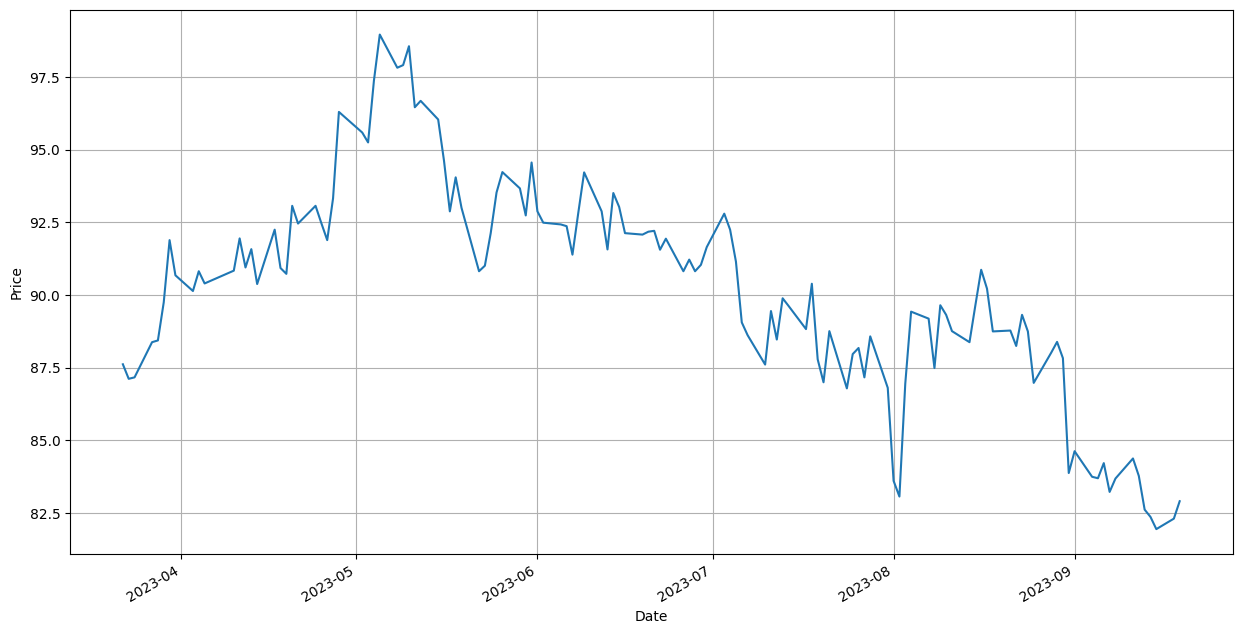

In [105]:
df['close'].plot(figsize = (15, 8))
plt.grid()
plt.ylabel("Price")
plt.show()

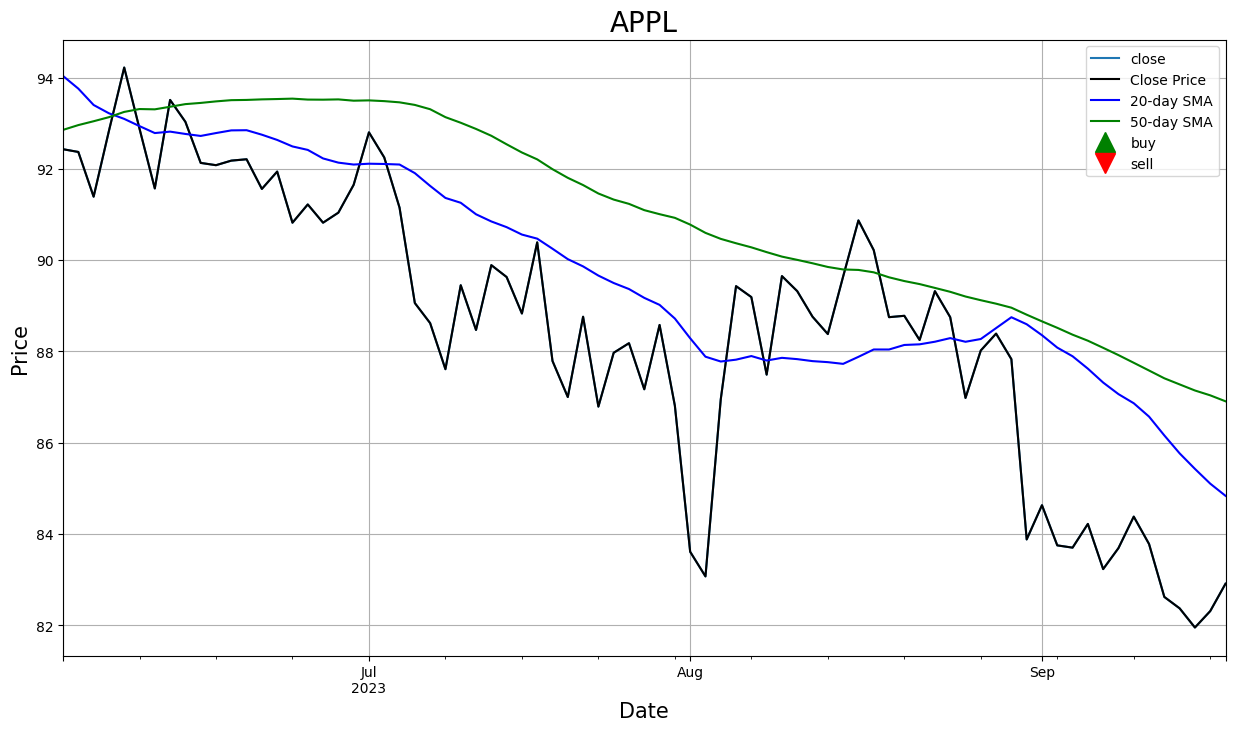

In [106]:
df2['close'].plot(figsize = (15, 8))

# plot close price, short-term and long-term moving averages 
df2['close'].plot(color = 'k', label= 'Close Price') 
df2['20_SMA'].plot(color = 'b',label = '20-day SMA') 
df2['50_SMA'].plot(color = 'g', label = '50-day SMA')
# plot 'buy' signals
plt.plot(df2[df2['Position'] == 1].index, 
         df2['20_SMA'][df2['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot 'sell' signals
plt.plot(df2[df2['Position'] == -1].index, 
         df2['20_SMA'][df2['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('APPL', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

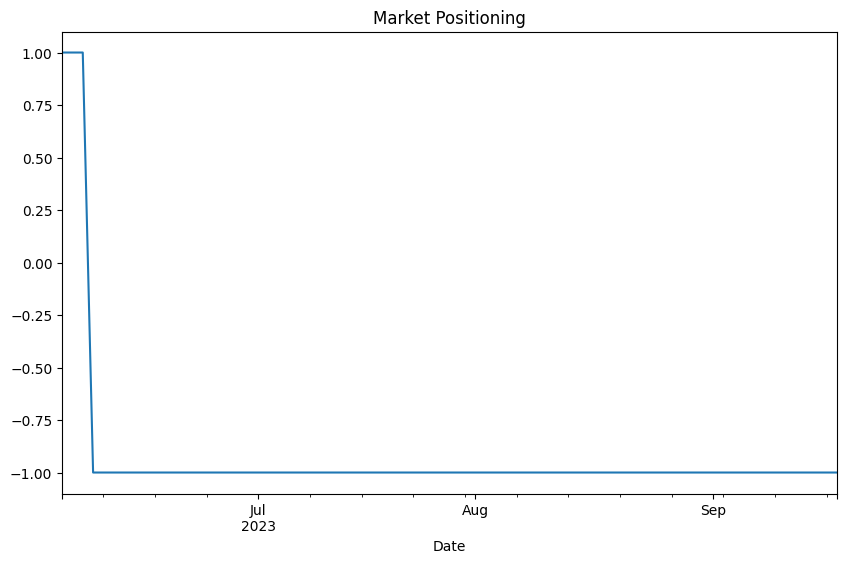

In [107]:
df2.dropna(inplace=True)
df2['Position_alt'].plot(ylim=[-1.1, 1.1],
                               title='Market Positioning',
                               figsize=(10, 6));

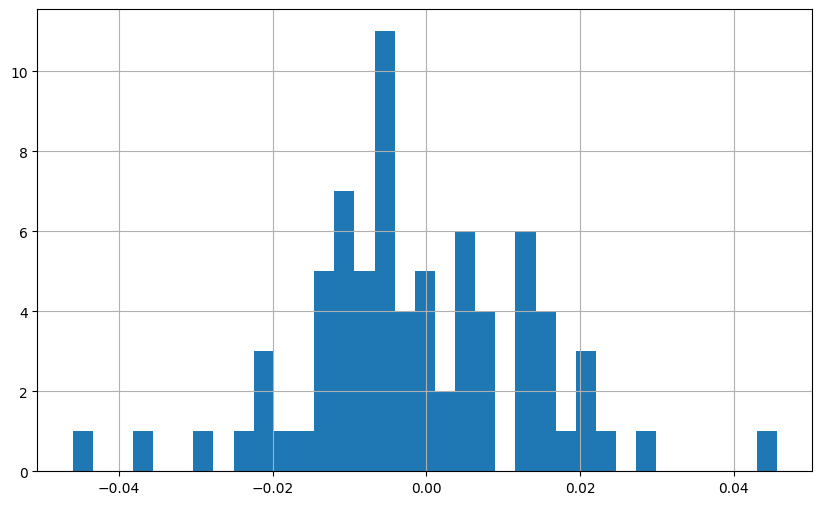

In [108]:
df2['returns'] = np.log(df2['close'] / df2['close'].shift(1))
df2['returns'].hist(bins=35, figsize=(10, 6));

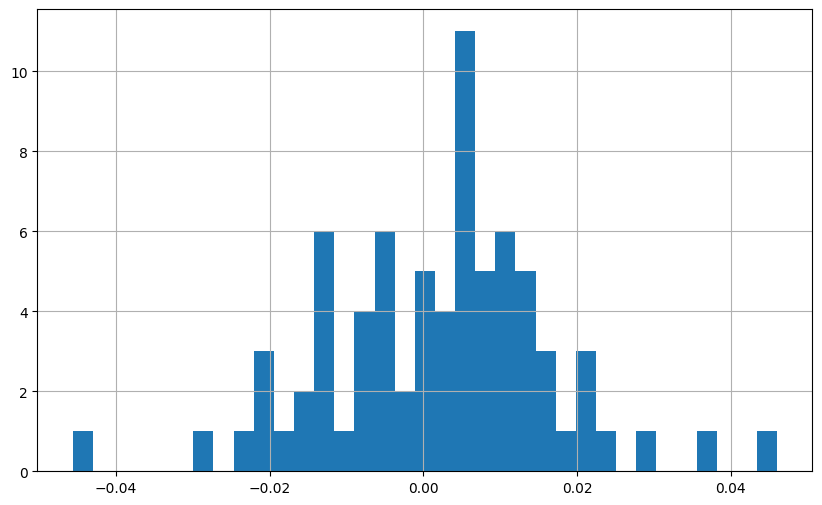

In [109]:
df2['strategy'] = df2['Position_alt'].shift(1) * df2['returns']
df2['strategy'].hist(bins=35, figsize=(10, 6));

In [110]:
#df2[['returns_l', 'strategy_l']].prod()
#df2[['returns', 'strategy']].prod().apply(np.exp)

In [111]:
df2[['returns', 'strategy']].sum().apply(np.exp)

BIMBOA.MX
returns     0.897586
strategy    1.159173
dtype: float64

In [112]:
df.head()

BIMBOA.MX,high,low,close,20_SMA,50_SMA
Date,,,,,
2023-03-22,89.4,87.34,87.62,87.620000,87.620000
2023-03-23,88.57,86.65,87.12,87.370000,87.370000
2023-03-24,88.0,86.54,87.17,87.303333,87.303333
2023-03-27,88.87,87.61,88.38,87.572500,87.572500
2023-03-28,90.0,88.22,88.44,87.746000,87.746000


# Bollinger Bands

In [113]:
s = talib.BBANDS(df.close,   # Number of periods (2 to 100000)
                 timeperiod=20,
                 nbdevup=2,    # Deviation multiplier for lower band
                 nbdevdn=2,    # Deviation multiplier for upper band
                 matype=1      # default: SMA
                 )

In [114]:
bb_bands = ['upper', 'middle', 'lower']


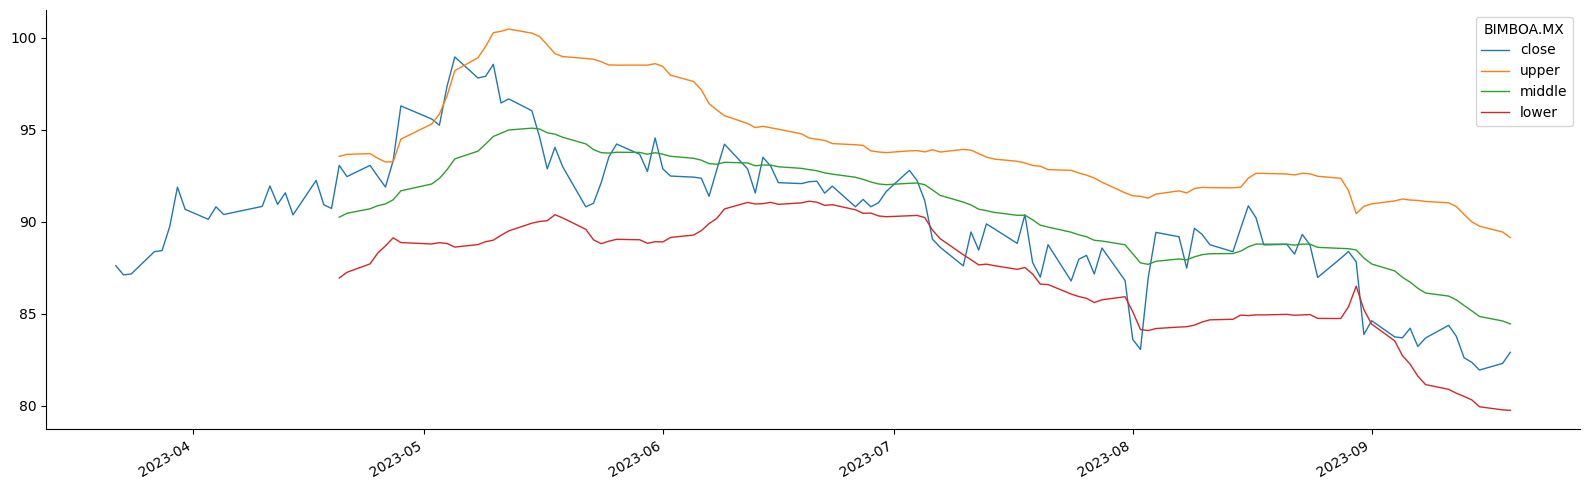

In [115]:
df = df.assign(**dict(zip(bb_bands, s)))
ax = df.loc[:, ['close'] + bb_bands].plot(figsize=(16, 5), lw=1)

ax.set_xlabel('')
sns.despine()
plt.tight_layout();

In [116]:
s

(Date
 2023-03-22          NaN
 2023-03-23          NaN
 2023-03-24          NaN
 2023-03-27          NaN
 2023-03-28          NaN
                 ...    
 2023-09-13    90.404957
 2023-09-14    90.003780
 2023-09-15    89.766129
 2023-09-18    89.448646
 2023-09-19    89.149046
 Length: 127, dtype: float64,
 Date
 2023-03-22          NaN
 2023-03-23          NaN
 2023-03-24          NaN
 2023-03-27          NaN
 2023-03-28          NaN
                 ...    
 2023-09-13    85.460780
 2023-09-14    85.166420
 2023-09-15    84.860094
 2023-09-18    84.617228
 2023-09-19    84.454635
 Length: 127, dtype: float64,
 Date
 2023-03-22          NaN
 2023-03-23          NaN
 2023-03-24          NaN
 2023-03-27          NaN
 2023-03-28          NaN
                 ...    
 2023-09-13    80.516602
 2023-09-14    80.329059
 2023-09-15    79.954060
 2023-09-18    79.785811
 2023-09-19    79.760223
 Length: 127, dtype: float64)

# MACD

In [117]:
macd, macdsignal, macdhist = talib.MACD(df.close,
                                        fastperiod=12,
                                        slowperiod=26,
                                        signalperiod=9)
df['MACD'] = macd
df['MACDSIG'] = macdsignal
df['MACDHIST'] = macdhist

In [118]:
df[['close', 'MACD', 'MACDSIG', 'MACDHIST']]

BIMBOA.MX,close,MACD,MACDSIG,MACDHIST
Date,,,,
2023-03-22,87.62,NaN,NaN,NaN
2023-03-23,87.12,NaN,NaN,NaN
2023-03-24,87.17,NaN,NaN,NaN
2023-03-27,88.38,NaN,NaN,NaN
2023-03-28,88.44,NaN,NaN,NaN
...,...,...,...,...
2023-09-13,82.62,-1.425955,-1.148965,-0.276990
2023-09-14,82.37,-1.493742,-1.217920,-0.275822
2023-09-15,81.95,-1.563334,-1.287003,-0.276331


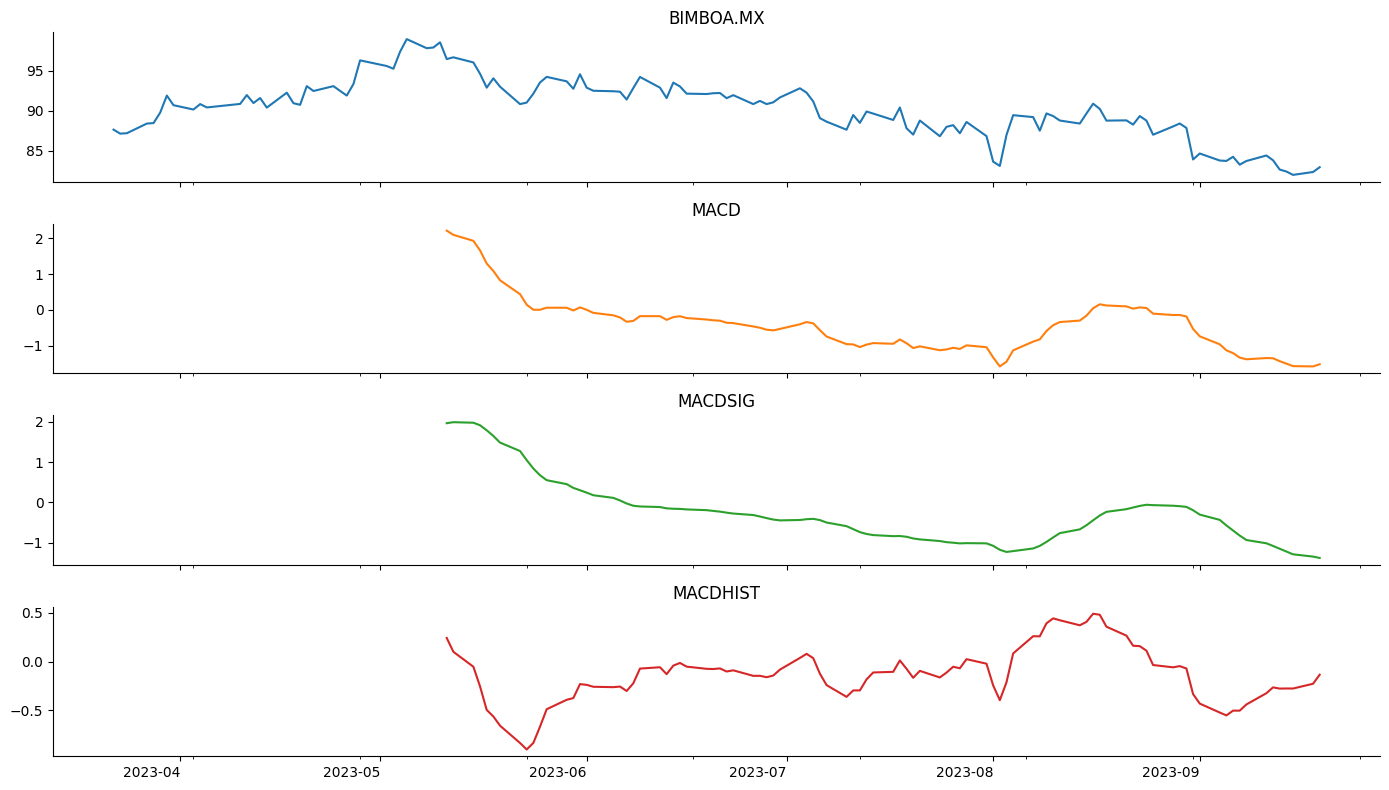

In [119]:
axes = df[['close', 'MACD', 'MACDSIG', 'MACDHIST']].plot(figsize=(14, 8),
               rot=0,
               subplots=True,
               title=['BIMBOA.MX', 'MACD', 'MACDSIG', 'MACDHIST'],
               legend=False)

axes[-1].set_xlabel('')
sns.despine()
plt.tight_layout()

In [120]:
df

BIMBOA.MX,high,low,close,20_SMA,50_SMA,upper,middle,lower,MACD,MACDSIG,MACDHIST
Date,,,,,,,,,,,
2023-03-22,89.4,87.34,87.62,87.620000,87.620000,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-23,88.57,86.65,87.12,87.370000,87.370000,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-24,88.0,86.54,87.17,87.303333,87.303333,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-27,88.87,87.61,88.38,87.572500,87.572500,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-28,90.0,88.22,88.44,87.746000,87.746000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-13,83.65,81.5,82.62,86.158500,87.410600,90.404957,85.460780,80.516602,-1.425955,-1.148965,-0.276990
2023-09-14,83.39,81.72,82.37,85.766000,87.276800,90.003780,85.166420,80.329059,-1.493742,-1.217920,-0.275822
2023-09-15,83.25,81.51,81.95,85.426000,87.143400,89.766129,84.860094,79.954060,-1.563334,-1.287003,-0.276331


In [121]:
df2 = df[50:]
df2.head()
df2['Signal'] = 0.0
df2['Signal'] = np.where(df2['MACD'] > df2['MACDSIG'], 1.0, 0.0)
df2['Position_alt'] = np.where(df2['MACD'] > df2['MACDSIG'], 1.0, -1.0)
df2.head(10)

BIMBOA.MX,high,low,close,20_SMA,50_SMA,upper,middle,lower,MACD,MACDSIG,MACDHIST,Signal,Position_alt
Date,,,,,,,,,,,,,
2023-06-05,92.75,91.75,92.43,94.0345,92.8536,97.624126,93.454534,89.284942,-0.149436,0.112961,-0.262397,0.0,-1.0
2023-06-06,93.44,92.03,92.37,93.7575,92.9586,97.176006,93.351245,89.526484,-0.207169,0.048935,-0.256104,0.0,-1.0
2023-06-07,92.87,91.16,91.39,93.3990,93.0430,96.423741,93.164460,89.905178,-0.328216,-0.026495,-0.301721,0.0,-1.0
2023-06-08,93.4,91.7,92.83,93.2175,93.1320,96.079122,93.132607,90.186091,-0.304442,-0.082084,-0.222358,0.0,-1.0
2023-06-09,94.9,92.97,94.22,93.0945,93.2476,95.770859,93.236168,90.701477,-0.171463,-0.099960,-0.071503,0.0,-1.0
2023-06-12,94.26,92.12,92.88,92.9365,93.3102,95.346731,93.202247,91.057763,-0.172218,-0.114412,-0.057806,0.0,-1.0
2023-06-13,93.2,91.38,91.57,92.7840,93.3038,95.123431,93.046795,90.970159,-0.275348,-0.146599,-0.128749,0.0,-1.0
2023-06-14,93.76,91.59,93.51,92.8155,93.3604,95.191390,93.090910,90.990429,-0.198252,-0.156930,-0.041323,0.0,-1.0
2023-06-15,94.51,92.12,93.03,92.7645,93.4182,95.111440,93.085109,91.058777,-0.173881,-0.160320,-0.013561,0.0,-1.0


In [122]:
df2['Position'] = df2['Signal'].diff()
# display first few rows
df2.head()

BIMBOA.MX,high,low,close,20_SMA,50_SMA,upper,middle,lower,MACD,MACDSIG,MACDHIST,Signal,Position_alt,Position
Date,,,,,,,,,,,,,,
2023-06-05,92.75,91.75,92.43,94.0345,92.8536,97.624126,93.454534,89.284942,-0.149436,0.112961,-0.262397,0.0,-1.0,NaN
2023-06-06,93.44,92.03,92.37,93.7575,92.9586,97.176006,93.351245,89.526484,-0.207169,0.048935,-0.256104,0.0,-1.0,0.0
2023-06-07,92.87,91.16,91.39,93.3990,93.0430,96.423741,93.164460,89.905178,-0.328216,-0.026495,-0.301721,0.0,-1.0,0.0
2023-06-08,93.4,91.7,92.83,93.2175,93.1320,96.079122,93.132607,90.186091,-0.304442,-0.082084,-0.222358,0.0,-1.0,0.0
2023-06-09,94.9,92.97,94.22,93.0945,93.2476,95.770859,93.236168,90.701477,-0.171463,-0.099960,-0.071503,0.0,-1.0,0.0


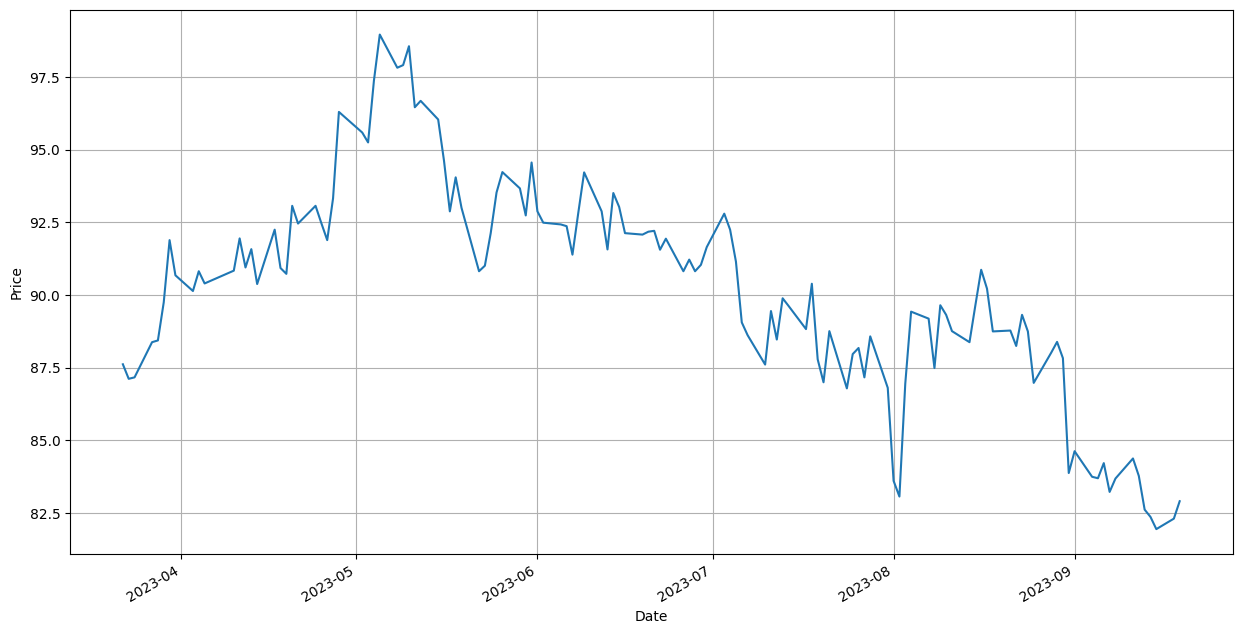

In [123]:
df['close'].plot(figsize = (15, 8))
plt.grid()
plt.ylabel("Price")
plt.show()

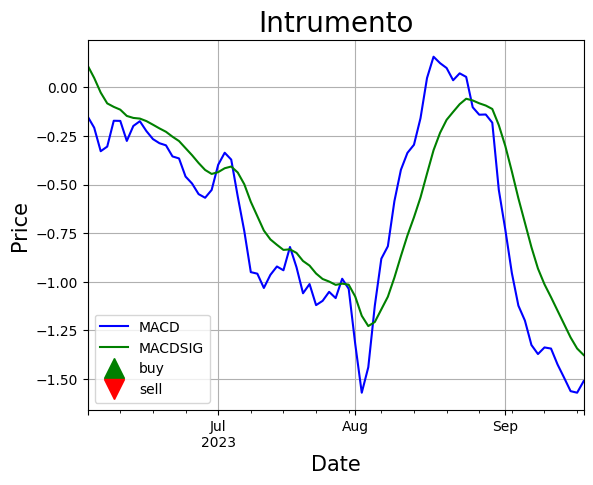

In [124]:

df2['MACD'].plot(color = 'b',label = 'MACD') 
df2['MACDSIG'].plot(color = 'g', label = 'MACDSIG')
# plot 'buy' signals
plt.plot(df2[df2['Position'] == 1].index, 
         df2['MACD'][df2['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot 'sell' signals
plt.plot(df2[df2['Position'] == -1].index, 
         df2['MACD'][df2['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Intrumento', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

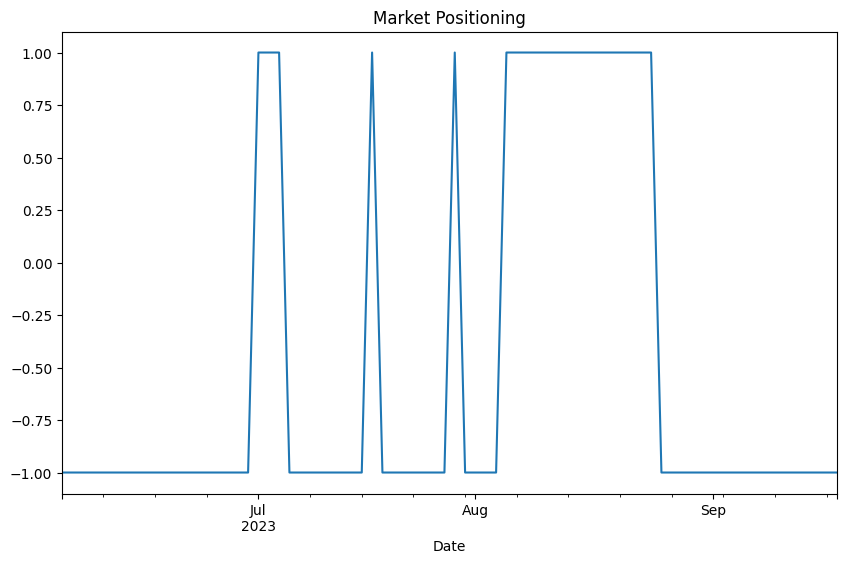

In [125]:
df2.dropna(inplace=True)
df2['Position_alt'].plot(ylim=[-1.1, 1.1],
                               title='Market Positioning',
                               figsize=(10, 6));

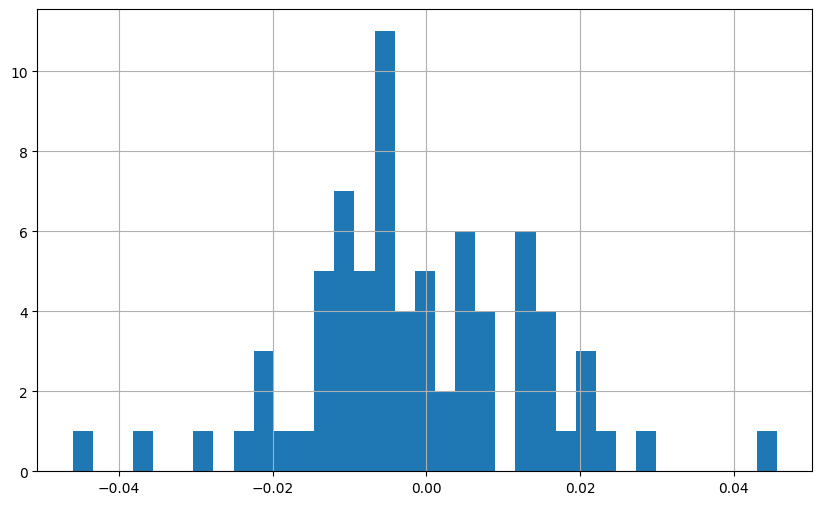

In [126]:
df2['returns'] = np.log(df2['close'] / df2['close'].shift(1))
df2['returns'].hist(bins=35, figsize=(10, 6));

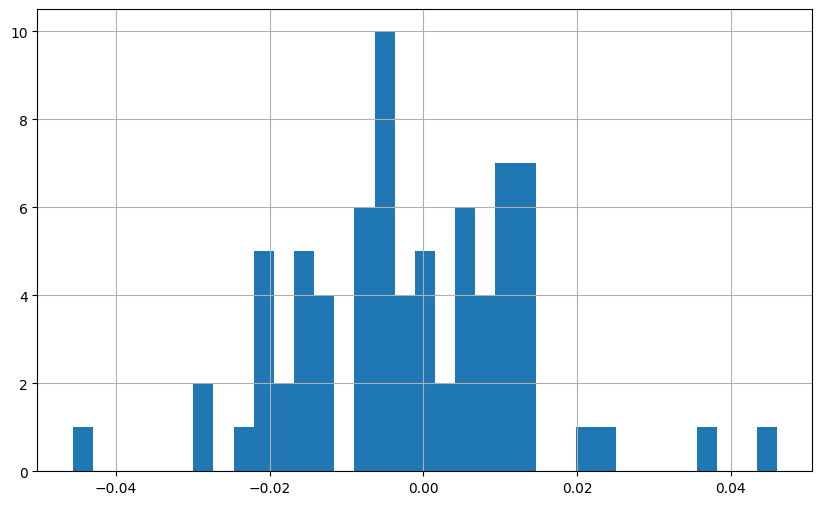

In [127]:
df2['strategy'] = df2['Position_alt'].shift(1) * df2['returns']
df2['strategy'].hist(bins=35, figsize=(10, 6));

In [128]:
df2[['returns', 'strategy']].sum().apply(np.exp)

BIMBOA.MX
returns     0.897586
strategy    0.879394
dtype: float64